<a href="https://colab.research.google.com/github/bappy15010/Brain-Tumor-Detection/blob/master/Final_Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green'> **Details on Br35H-Mask-RCNN dataset**:

*   <font color='green'>TRAIN -

*   <font color='green'> TEST -  

*  <font color='green'> VALID -

1.  <font color='green'> No - The folder no contains 1500 Brain MRI Images that are non-tumorous

1.  <font color='green'> Pred

1.  <font color='green'> Yes - The folder yes contains 1500 Brain MRI Images that are tumorous


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import tensorflow as tf # Import TensorFlow library
tf.test.gpu_device_name() # Check if a GPU device is available

'/device:GPU:0'

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import warnings
import glob

# Suppressing warnings
warnings.filterwarnings("ignore")


# Importing InceptionV3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3

<font color='blue'> **Modified original code**

---



---



In [4]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the desired directory
os.chdir('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/yes/')

# Access files and directories in the specified location
# For example, you can list the files in the directory
files = os.listdir()
print("Files in the directory:")
print(files)


Mounted at /content/drive
Files in the directory:
['y1267.jpg', 'y1.jpg', 'y1108.jpg', 'y14.jpg', 'y176.jpg', 'y1199.jpg', 'y1040.jpg', 'y1092.jpg', 'y101.jpg', 'y1341.jpg', 'y1026.jpg', 'y1225.jpg', 'y1305.jpg', 'y1087.jpg', 'y1132.jpg', 'y1020.jpg', 'y1412.jpg', 'y1486.jpg', 'y15.jpg', 'y1392.jpg', 'y11.jpg', 'y1269.jpg', 'y1164.jpg', 'y1210.jpg', 'y1140.jpg', 'y1477.jpg', 'y1057.jpg', 'y136.jpg', 'y1363.jpg', 'y1277.jpg', 'y1496.jpg', 'y1176.jpg', 'y1141.jpg', 'y1158.jpg', 'y1360.jpg', 'y1423.jpg', 'y1006.jpg', 'y1414.jpg', 'y1190.jpg', 'y1215.jpg', 'y1435.jpg', 'y1483.jpg', 'y1472.jpg', 'y1106.jpg', 'y109.jpg', 'y1443.jpg', 'y1097.jpg', 'y1278.jpg', 'y126.jpg', 'y1295.jpg', 'y1101.jpg', 'y1187.jpg', 'y1499.jpg', 'y1134.jpg', 'y1282.jpg', 'y1257.jpg', 'y1339.jpg', 'y1163.jpg', 'y202.jpg', 'y1066.jpg', 'y1231.jpg', 'y1366.jpg', 'y1137.jpg', 'y1407.jpg', 'y1433.jpg', 'y1178.jpg', 'y1367.jpg', 'y1352.jpg', 'y1461.jpg', 'y1274.jpg', 'y1473.jpg', 'y160.jpg', 'y1324.jpg', 'y105.jpg', 'y10

In [5]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the desired directory
os.chdir('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/no/')

# Access files and directories in the specified location
# For example, you can list the files in the directory
files = os.listdir()
print("Files in the directory:")
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in the directory:
['no270.jpg', 'no1470.jpg', 'no1455.jpg', 'no238.jpg', 'no157.jpg', 'no1176.jpg', 'no1424.jpg', 'no1330.jpg', 'no248.jpg', 'no177.jpg', 'no185.jpg', 'no260.jpg', 'no1162.jpg', 'no1489.jpg', 'no1452.jpg', 'no1495.jpg', 'no1372.jpg', 'no1269.jpg', 'no1475.jpg', 'no1146.jpg', 'no1426.jpg', 'no1312.jpg', 'no1086.jpg', 'no1287.jpg', 'no1214.jpg', 'no1342.jpg', 'no1471.jpg', 'no204.jpg', 'no1114.jpg', 'no1451.jpg', 'no264.jpg', 'no1095.jpg', 'no1301.jpg', 'no1056.jpg', 'no120.jpg', 'no1421.jpg', 'no1217.jpg', 'no230.jpg', 'no265.jpg', 'no1131.jpg', 'no1266.jpg', 'no1305.jpg', 'no1291.jpg', 'no21.jpg', 'no237.jpg', 'no1304.jpg', 'no1168.jpg', 'no1283.jpg', 'no262.jpg', 'no25.jpg', 'no1082.jpg', 'no1083.jpg', 'no193.jpg', 'no1066.jpg', 'no1428.jpg', 'no1245.jpg', 'no1412.jpg', 'no220.jpg', 'no1407.jpg', 'no279.jpg', 'no1350.jpg', 'no1166.jpg',

In [6]:
import cv2
import glob
import numpy as np

# Initialize empty lists to store image data and labels
tumor = []
no_tumor = []

# Iterate through all image files in the 'yes' directory
for file in glob.iglob('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/yes/*.jpg'):
    img = cv2.imread(file)  # Read the image from the file path
    if img is not None:  # Check if the image is loaded successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the color space from BGR to RGB
        img = cv2.resize(img, (512, 512))  # Resize the image to a fixed size of 512x512 pixels so CNN can take it
        tumor.append((img, 1))  # Append a tuple containing the preprocessed image and label 1 (tumor) to the tumor list

# Iterate through all image files in the 'no' directory
for file in glob.iglob('/content/drive/My Drive/Colab Notebooks/BIO 6306/Brain Tumor Detection Convolutional Neural Network Project/Modified/DATASET/no/*.jpg'):
    img = cv2.imread(file)  # Read the image from the file path
    if img is not None:  # Check if the image is loaded successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the color space from BGR to RGB
        img = cv2.resize(img, (512, 512))  # Resize the image to a fixed size of 512x512 pixels so CNN can take it
        no_tumor.append((img, 0))  # Append a tuple containing the preprocessed image and label 0 (no tumor) to the no_tumor list

data = tumor + no_tumor  # Combine the tumor and no_tumor lists to create a single list containing all the data

# Extract the image data (x) and labels (y) from the combined data list
x = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])


#NOTE
#In this code, the features (X) are the images themselves, and the labels (y) are whether or not the
#image contains a tumor.

#Features (X): The features are the images themselves, which are stored in the variable x. Each image is
#preprocessed (converted to RGB and resized) and stored in the x array.
#Labels (y): The labels indicate whether each image contains a tumor or not. They are stored in the variable
#y. The label 1 represents that a tumor is present, while 0 represents no tumor.

#. So for each image, you have its features (the image itself with tumor or no tumor) in x and its label (0 or 1) in y

In [7]:
def plot_img(i):
    plt.figure(figsize=(7,7))     # Create a new figure with a specified size
    plt.imshow(x[i])     # Display the image indexed by 'i' from the array 'x'
    if y[i]==1:     # Check the label of the image
        plt.title('Tumor')         # If the label is 1, set the title to 'Tumor'
    if y[i]==0:         # If the label is 0, set the title to 'No_Tumor'
        plt.title('No_Tumor')

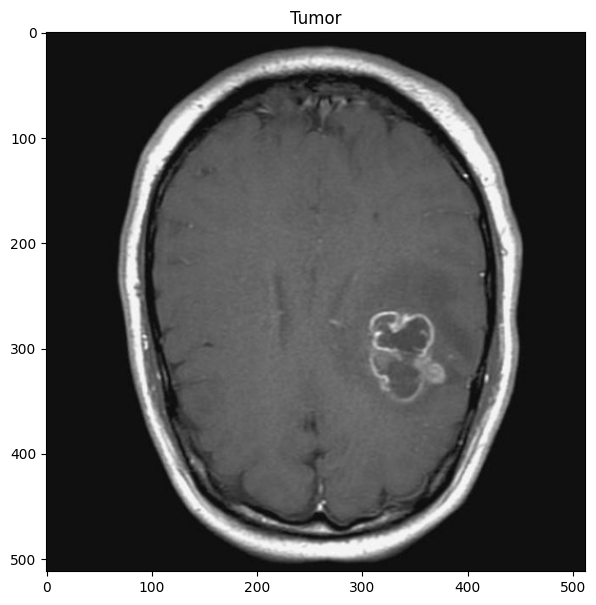

In [8]:
import matplotlib.pyplot as plt
plot_img(300) #This function plot_img(300) will plot the image at index 300 from the dataset along with its
#corresponding label. If the label associated with the image at index 300 is 1, it will be titled 'Tumor', and if
#the label is 0, it will be titled 'No_Tumor'.


Notice 512 x 512 dimensions

In [9]:
from sklearn.utils import shuffle
x,y=shuffle(x,y,random_state=101) # Shuffle the data

In [10]:
#split data
#so when you split into x train x valid x test and y train y valid y test, your x train for example should
#print an image (pixel values) and the corresponding y train should be 1 or 0 signalling either no tumor or a
#tumor


from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
#Normalizing the pixel values of your image data before feeding them into a machine learning model.
#Normalizing pixel values can help improve the training process and convergence of the model.
#The typical range of pixel values in images is [0, 255], where 0 represents black and 255 represents white.
#By dividing all pixel values by 255, you scale them to the range [0, 1], making them suitable for many machine
#learning algorithms, especially those that expect input features to be on a similar scale.
#x_train=x_train/255
#x_test=x_test/255

In [12]:
print(y_train)

[1 1 1 ... 1 0 1]


In [13]:
print(x_train.shape) #The shape (2100, 150, 150, 3) indicates that there are 2100 samples in the training set, each sample is a 3D array with dimensions 150x150x3. This typically represents images with a height and width of 150 pixels and 3 channels (RGB).
print(x_temp.shape)
print(x_test.shape)
print(y_train.shape)
print(y_temp.shape)
print(y_test.shape) # This line prints the shape of the testing labels y_test. The shape (450,) indicates that there are 450 labels

(2100, 512, 512, 3)
(900, 512, 512, 3)
(450, 512, 512, 3)
(2100,)
(900,)
(450,)


In [14]:
print(x_train)
#output you provided seems to be a representation of the pixel values of an image
#For example, [0.21568627 0.21568627 0.21568627] represents a pixel with Red=0.21568627, Green=0.21568627, and Blue=0.21568627.
# The pixel values you provided are indeed very low, suggesting that the image is likely to appear mostly dark or black.
#In the RGB color space, where each channel value ranges from 0 to 1, values close to 0 indicate darker shades.
#Therefore, when all three RGB channels have values close to 0, the resulting color is dark or black.

[[[[ 24  24  24]
   [ 33  33  33]
   [ 47  47  47]
   ...
   [ 56  56  56]
   [ 55  55  55]
   [ 55  55  55]]

  [[ 39  39  39]
   [ 48  48  48]
   [ 64  64  64]
   ...
   [ 52  52  52]
   [ 53  53  53]
   [ 53  53  53]]

  [[ 50  50  50]
   [ 54  54  54]
   [ 61  61  61]
   ...
   [ 50  50  50]
   [ 51  51  51]
   [ 52  52  52]]

  ...

  [[251 251 251]
   [252 252 252]
   [254 254 254]
   ...
   [ 45  45  45]
   [ 45  45  45]
   [ 46  46  46]]

  [[251 251 251]
   [252 252 252]
   [254 254 254]
   ...
   [ 45  45  45]
   [ 44  44  44]
   [ 43  43  43]]

  [[251 251 251]
   [252 252 252]
   [254 254 254]
   ...
   [ 45  45  45]
   [ 43  43  43]
   [ 43  43  43]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

In [15]:
#Model building starts
#import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
#from keras.layers.normalization import BatchNormalization
#import numpy as np

tf.keras.backend.clear_session()

In [16]:
#Initial  BLock of the model
# Define the input layer with a shape of 512x512 pixels and 1 channel (assuming rgb images)
ini_input=keras.Input(shape=(512,512,3),name="image")



# First convolutional layer with 64 filters of size 22x22 pixels and a stride of 2
x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
# Max pooling layer with a pool size of 4x4
x1=layers.MaxPooling2D((4,4))(x1)
# Batch normalization layer
x1=layers.BatchNormalization()(x1)


# Second convolutional layer with 128 filters of size 11x11 pixels, using padding to maintain spatial dimensions
x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
# Max pooling layer with a pool size of 2x2
x2=layers.MaxPooling2D((2,2))(x2)
# Batch normalization layer
x2=layers.BatchNormalization()(x2)


# Third convolutional layer with 256 filters of size 7x7 pixels, using padding to maintain spatial dimensions
x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
# Max pooling layer with a pool size of 2x2
x3=layers.MaxPooling2D((2,2))(x3)
# Batch normalization layer
x3=layers.BatchNormalization()(x3)


# Fourth convolutional layer with 512 filters of size 3x3 pixels, using padding to maintain spatial dimensions
x4 = layers.Conv2D(512, (3, 3), strides=2, padding="same")(x3)
# Max pooling layer with a pool size of 2x2
x4 = layers.MaxPooling2D((2, 2))(x4)
# Batch normalization layer
x4 = layers.BatchNormalization()(x4)


# Global average pooling layer to reduce spatial dimensions to 1x1
x5 = layers.GlobalAveragePooling2D()(x4)
# ReLU activation function
x5 = layers.Activation("relu")(x5)

# First fully connected (dense) layer with 1024 units and ReLU activation function
x6 = layers.Dense(1024, "relu")(x5)
# Batch normalization layer
x6 = layers.BatchNormalization()(x6)

# Second fully connected (dense) layer with 512 units and ReLU activation function
x7 = layers.Dense(512, "relu")(x6)
# Batch normalization layer
x7 = layers.BatchNormalization()(x7)

# Third fully connected (dense) layer with 256 units and ReLU activation function
x8 = layers.Dense(256, "relu")(x7)
# Batch normalization layer
x8 = layers.BatchNormalization()(x8)
# Dropout layer with a dropout rate of 20%
x8 = layers.Dropout(0.2)(x8)

# Output layer with 3 units and softmax activation function for multi-class classification
#x9=layers.Dense(3)(x8)
#pred=layers.Activation("softmax")(x9)

# Output layer with 1 unit and sigmoid activation function for binary classification
output = layers.Dense(1, activation="sigmoid")(x8) #The sigmoid activation function, which is commonly used in the output layer for binary classification, squashes the network's output to a value between 0 and 1.



# Define the model with input and output layers
model = keras.Model(inputs=ini_input, outputs=output)

In [17]:
model.summary()

#provides a concise summary of the model architecture (CNN), including the number of parameters in
#each layer and the total number of parameters in the model

#Layer (type): Name and type of the layer in the model.
#Output Shape: Shape of the output tensor produced by the layer.
#Param #: Number of trainable parameters in the layer.
#Total params: Total number of trainable parameters in the model.
#Trainable params: Total number of trainable parameters in the model that will be updated during training.
#Non-trainable params: Total number of non-trainable parameters in the model (typically associated with BatchNormalization layers).


#For example,
#Layer (type): This indicates the type of layer. In this case, it's an input layer.
#Output Shape: This describes the shape of the output produced by this layer. In this case, it indicates that the layer expects input data with a shape of (None, 512, 512, 3). Here, None represents the batch size, and 512x512x3 represents the dimensions of the input data. Specifically, 512x512 refers to the height and width of the input images, and 3 refers to the number of channels.
#Param #: This represents the number of parameters (weights) that the layer has. Since this is an input layer, it doesn't have any parameters to learn, so the parameter count is 0.
#In summary, this line indicates that the model expects input data in the form of images with a height and width of 512 pixels and 3 color channels (assuming RGB images).


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 246, 246, 64)      92992     
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 61, 61, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 128)       991360    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 128)       0     

The above is a summary of the layers within a CNN model. Essentially the input images will go through the cnn and the cnn will learn it so well to be able to tell if it is a tumor or not. how exactly is goes about it so complex, it can be described like a black box.  Yes, CNNs can indeed be considered as "black box" models, especially in complex architectures or when dealing with large datasets. While we can understand the general principles behind how they work, the exact process by which they learn to classify images can be quite intricate and difficult to interpret directly.



In [18]:
#model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) # compiles the model, specifying the loss function, optimizer, and evaluation metrics to be used during training.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


#loss="sparse_categorical_crossentropy": This specifies the loss function to be used during training.
#In this case, it's the sparse categorical cross-entropy loss, which is commonly used for multi-class
#classification problems where the labels are integers.

#Binary Crossentropy: Binary crossentropy is typically used for binary classification tasks where there are only two classes. It calculates the crossentropy loss between the true labels and the predicted probabilities for each class independently. This loss function is suitable when your model outputs a single probability value representing the likelihood of belonging to one of the two classes.

#optimizer="adam": This specifies the optimizer to be used for training the model. "Adam" is a popular
#optimization algorithm that dynamically adjusts the learning rate during training based on the gradients
#of the loss function.

#metrics=["accuracy"]: This specifies the evaluation metric to be used to monitor the performance of the
#model during training. In this case, "accuracy" is used, which measures the proportion of correctly
#classified samples.

#After compiling the model, it's ready to be trained using the specified loss function, optimizer, and
#evaluation metrics.

In [19]:
r=model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=10,
          verbose=1,
          validation_data=(x_valid,y_valid),
          shuffle=False
          )

Epoch 1/200
210/210 [==============================] - 34s 93ms/step - loss: 0.6353 - accuracy: 0.7010 - val_loss: 0.5767 - val_accuracy: 0.7067
Epoch 2/200
210/210 [==============================] - 18s 85ms/step - loss: 0.4839 - accuracy: 0.7862 - val_loss: 0.3533 - val_accuracy: 0.8489
Epoch 3/200
210/210 [==============================] - 18s 87ms/step - loss: 0.4081 - accuracy: 0.8176 - val_loss: 0.4791 - val_accuracy: 0.7889
Epoch 4/200
210/210 [==============================] - 20s 94ms/step - loss: 0.3058 - accuracy: 0.8767 - val_loss: 0.3131 - val_accuracy: 0.8667
Epoch 5/200
210/210 [==============================] - 19s 92ms/step - loss: 0.2469 - accuracy: 0.9090 - val_loss: 0.3124 - val_accuracy: 0.8644
Epoch 6/200
210/210 [==============================] - 19s 92ms/step - loss: 0.1898 - accuracy: 0.9286 - val_loss: 0.3167 - val_accuracy: 0.8800
Epoch 7/200
210/210 [==============================] - 19s 91ms/step - loss: 0.1732 - accuracy: 0.9381 - val_loss: 0.4209 - val_ac

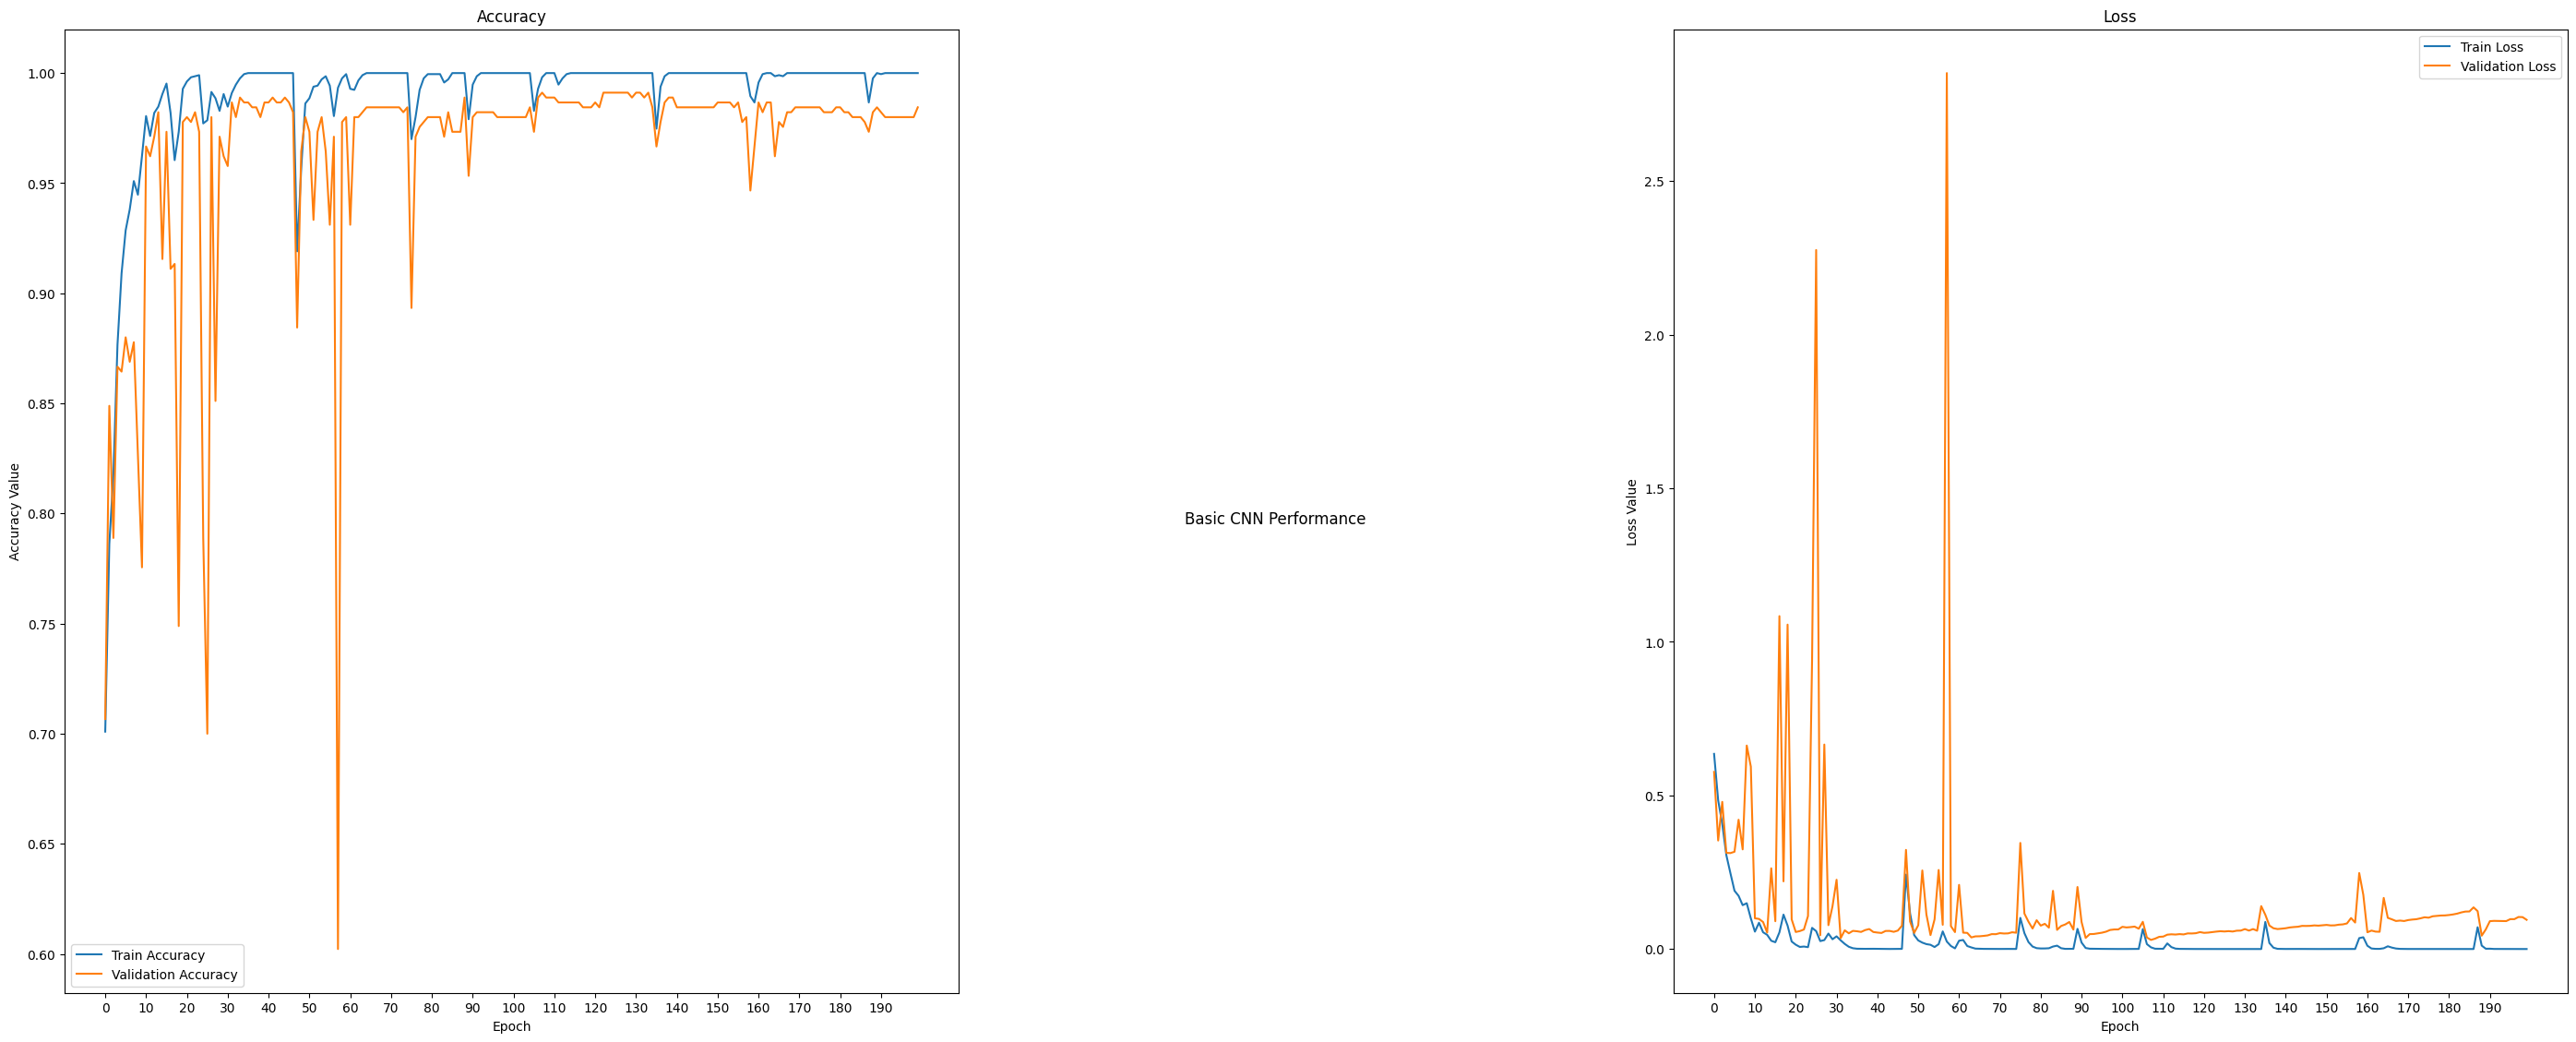

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 6))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=1.85, wspace=0.8)

epoch_list = list(range(0,200))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 200, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 200, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [47]:
y_pred=model.predict(x_test)
y_pred

15/15 [==============================] - 2s 105ms/step


array([[9.99990702e-01],
       [3.31793126e-05],
       [2.49500516e-16],
       [1.60459182e-16],
       [9.99992013e-01],
       [1.62978849e-05],
       [1.67018352e-05],
       [1.00000000e+00],
       [1.87204022e-16],
       [7.36538505e-16],
       [3.78359277e-06],
       [3.27803245e-05],
       [1.24360922e-05],
       [7.18837919e-06],
       [1.00000000e+00],
       [2.01878669e-09],
       [9.99998331e-01],
       [5.66681156e-05],
       [1.00000000e+00],
       [9.99999285e-01],
       [9.99966860e-01],
       [1.46073954e-18],
       [1.02394347e-06],
       [1.00000000e+00],
       [2.57604679e-05],
       [1.79452963e-05],
       [5.90625259e-13],
       [4.24298250e-08],
       [9.99999166e-01],
       [1.00000000e+00],
       [1.25659164e-03],
       [9.99978781e-01],
       [3.73934045e-14],
       [1.20930045e-12],
       [3.96757241e-05],
       [5.47519985e-09],
       [9.99992967e-01],
       [1.27993180e-08],
       [8.43823582e-05],
       [9.96725023e-01],


From the above, the first row suggests a very high probability (close to 1) of belonging to the positive class.


In [48]:
y_pred=model.predict(x_test) # Make predictions on the test data using the trained model
y_pred=np.round(y_pred,0) # Round the predictions to the nearest integer (0 or 1), remember you used softmax
y_pred[:5] # Print the first 5 elements of the rounded predictions array


15/15 [==============================] - 1s 102ms/step


array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [49]:
y_pred.shape #The shape of Y_pred represents the dimensions of the array storing the predicted class labels.


(450, 1)

The shape (450, 1) indicates that y_pred is a two-dimensional array with 450 rows (corresponding to the 450 samples in the test data) and 1 column. So, when I referred to "one dimension," I meant that the array has a single column along the axis representing the features or attributes of each sample.








In [50]:
y_test.shape #The shape of testy represents the dimensions of the array storing the true class labels for
#the test data. Since it typically contains the true labels for each sample in the test data, the shape
#will be (n,), where n is the number of samples in the test data.

(450,)

The shape (450,) of the y_test array indicates that it contains 450 labels for the test data samples. Since it is a one-dimensional array, it suggests that you have a binary classification problem with only two classes (0 and 1).



In [53]:
from sklearn.metrics import confusion_matrix

# Convert probabilities to binary predictions using a threshold of 0.5
threshold = 0.5
#If you want to update y_pred to only show either 1 or 0 (instead of the probabilities),
#you can apply a threshold to convert the probabilities to binary predictions. Here's how you can do it:
binary_predictions = (y_pred[:, 0] >= threshold).astype(int)
print(binary_predictions)


[1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 0 1]


In [54]:
y_pred=binary_predictions #make binary_predictions to y_pred
y_pred


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [55]:
y_test #compared to actual values

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [56]:
from sklearn.metrics import classification_report, confusion_matrix # Import the necessary functions from scikit-learn
print('Confusion Matrix') # Print header for the confusion matrix
print(confusion_matrix(y_test, y_pred)) # Calculate and print the confusion matrix

Confusion Matrix
[[216   2]
 [  5 227]]


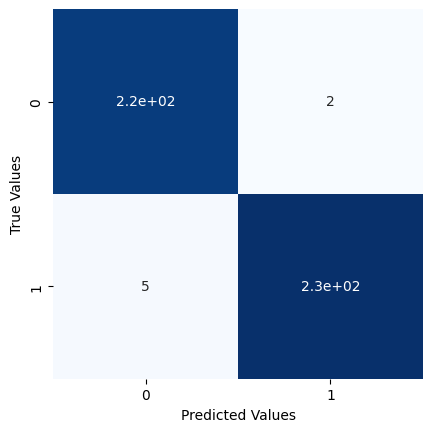

In [57]:
import seaborn as sns # Import the Seaborn library
cm=confusion_matrix(y_test, y_pred) # Calculate the confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues) # Create a heatmap of the confusion matrix using Seaborn

# Set labels for the x-axis and y-axis
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [58]:
from sklearn.metrics import classification_report

# Define target names
target_names = ['No Tumor', 'Tumor']

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       218
           1       0.99      0.98      0.98       232

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [59]:
import numpy as np
from sklearn import metrics

# Compute the Receiver Operating Characteristic (ROC) curve and the area under the curve (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1) #Since you mentioned that you want 0 to represent "no tumor" and 1 to represent "tumor", you should set pos_label=1.
metrics.auc(fpr, tpr) #calculates the Area Under the Curve (AUC) score using scikit-learn's auc function.


0.9846369819677318

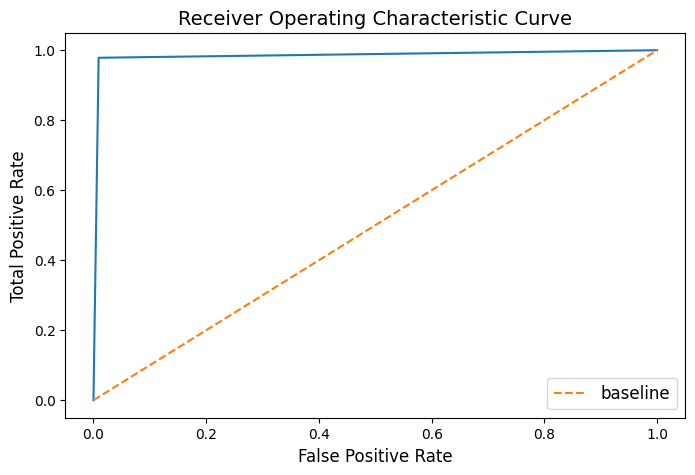

In [60]:
fig, ax = plt.subplots(figsize=(8,5)) # Create a new figure and axis for plotting
ax.plot(fpr, tpr) # Plot the ROC curve

# Plot the baseline (diagonal) line
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')

# Add title and labels to the plot
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)

# Add legend to the plot
plt.legend(fontsize=12);

#In summary, an ideal ROC curve would hug the top-left corner of the plot, with a TPR close to 1 and an FPR close to 0,
#resulting in an AUC of 1. This indicates a classifier that makes no errors in distinguishing between positive and negative instances.
#so roc tells you how good model is at making predictions
#auc is area under roc